In [4]:
import numpy as np
import networkx as nx
from bokeh.io import output_notebook
from bokeh.io import output_file, show, save
from bokeh.plotting import figure, from_networkx
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from taska import parseWikiData
import collections

### Load Graphs

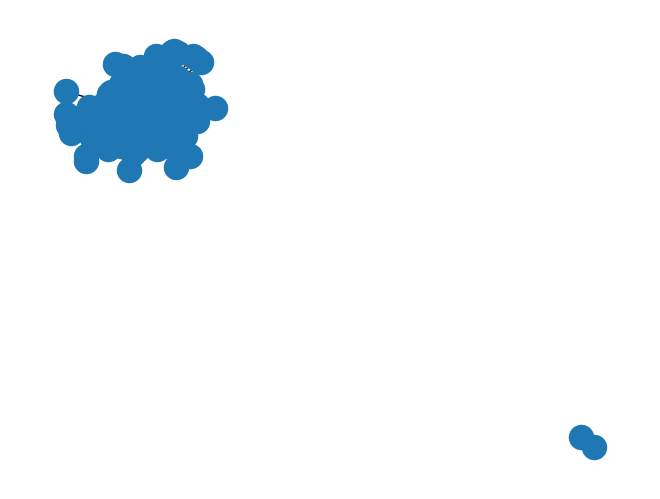

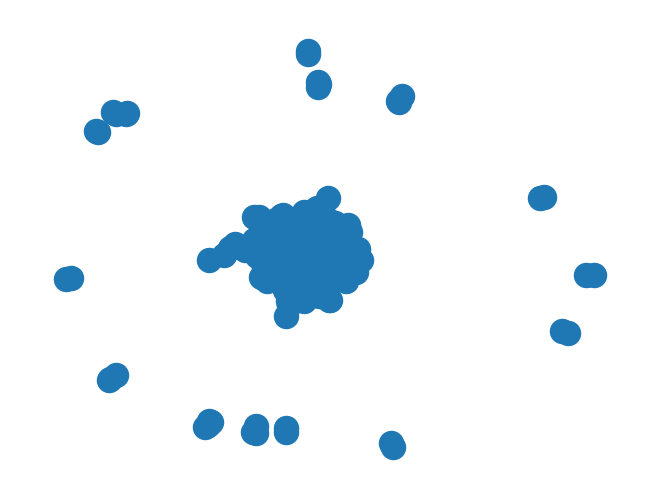

In [5]:
if __name__ == "__main__":
    filepath = 'datasets/PROPERTIES_FOR_DELETION_SML.csv'
    filepath2 = "datasets/WIKIPROJECTS_MED.csv"
    filepath3 = "datasets/REQUEST_FOR_DELETION_LRG.csv"

    graph1 = parseWikiData(filepath=filepath)
    graph2 = parseWikiData(filepath=filepath2)
    graph3 = parseWikiData(filepath=filepath3)

    nx.draw(graph1, with_labels = False)
    plt.show()
    nx.draw(graph2, with_labels = False)
    plt.show()
    nx.draw(graph3, with_labels = False)
    plt.show()

In [ ]:
 # If we want to plot the graph = subgraph(largest_component)
def bokeh_plot_simple(graph:nx.Graph, title:str, scale=2, crop_factors = None):
    
    crop_factors = dict(x_range=(-1.1,1.1), y_range=(-1.1,1.1)) \
        if crop_factors is None else crop_factors

    plot = figure(
        title=title, tools="",
        toolbar_location=None, **crop_factors)

    mapping = dict((n, i) for i, n in enumerate(graph.nodes))
    graph_mapped = nx.relabel_nodes(graph, mapping)

    graph_plot = from_networkx(
        graph_mapped, nx.spring_layout, scale=scale, center=(0,0))
    plot.renderers.append(graph_plot)

    #output_file("networkx_graph.html")
    show(plot)

output_notebook()

In [ ]:
bokeh_plot_simple(graph1, 'Graph 1', 4)
bokeh_plot_simple(graph2, 'Graph 2', 1)
bokeh_plot_simple(graph3, 'Graph 3', 2)

## i) Characteristics

### 1) graph statistics

In [ ]:
# i)1) Graph Statistics
def print_graph_statistics(graph:nx.Graph):
    print("Number of nodes: {}\nNumber of edges: {}".format(
        graph.number_of_nodes(), graph.number_of_edges()
    ))
    print("Number of connected components: {}".format(
        nx.algorithms.components.number_connected_components(graph),
    ))
    print("Average degree: {}\nClustering coefficient: {}".format(
        np.mean([deg for _, deg in graph.degree]),
        nx.algorithms.cluster.average_clustering(graph)
    ))

    try:  # attempt to compute the diameter of the graph
        diam = nx.algorithms.approximation.distance_measures.diameter(graph)
        print("Graph diameter: {}".format(diam))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")

In [ ]:
print_graph_statistics(graph1)
print()
print_graph_statistics(graph2)
print()
print_graph_statistics(graph3)

In [ ]:
def get_degree_count_distribution(graph):
    degree_sequence = [d for n, d in graph.degree()]
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.8)
    plt.title('Degree Histogram')
    plt.ylabel('Count')
    plt.xlabel('Degree')
    plt.show


### 2) high level stats

In [ ]:
def print_connected_statistics_with_average_shortest_path(component:nx.Graph):
    print("Number of nodes: {}\nNumber of edges: {}".format(
        component.number_of_nodes(), component.number_of_edges()
    ))
    print("Average path length: {}".format(
    nx.average_shortest_path_length(component)
    ))
    print("Number of connected components: {}".format(
        nx.algorithms.components.number_connected_components(component),
    ))
    print("Average degree: {}\nClustering coefficient: {}".format(
        np.mean([deg for _, deg in component.degree]),
        nx.algorithms.cluster.average_clustering(component)
    ))

    try:  # attempt to compute the diameter of the graph
        diam = nx.algorithms.approximation.distance_measures.diameter(component)
        print("Graph diameter: {}".format(diam))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")

In [ ]:
def print_statistics_for_largest_component(graph:nx.Graph):
    largest_component = max(nx.connected_components(graph), key=len)
    graph_largest_components = graph.subgraph(largest_component)
    print_connected_statistics_with_average_shortest_path(graph_largest_components)
    #Could do for all components
    # for i, conn_component in enumerate(
    #     nx.connected_components(graph)):
    #     print(f"[Graph component {i}]")
    #     sub_graph = graph.subgraph(conn_component)  # XXX Careful to manupulations!
    #     print_connected_component_statistics(sub_graph)
    #     print("-"*50 + "\n")

In [ ]:
print_statistics_for_largest_component(graph1)
print()
print_statistics_for_largest_component(graph2)
print()
print_statistics_for_largest_component(graph3)

### 3) Node level statistics

In [ ]:
def get_node_level_descriptors(graph:nx.Graph):
    degrees = [d for _, d in graph.degree()]
    degree_centrality = [d for _, d in nx.degree_centrality(graph).items()]
    ccoeffs = [d for _, d in nx.algorithms.cluster.clustering(graph).items()]
    ccentra = [d for _, d in nx.closeness_centrality(graph).items()]

    return {'degrees': degrees, 'degree_centrality': degree_centrality, 'clustering coefficients': ccoeffs, 'closenes centrality': ccentra}

In [ ]:
def plot_helper_node_level_descriptors(descriptors, titles, key):
    data = {titles[i]: descriptors[i][key] for i in range(len(titles))}
    sns.displot(data, height=4, aspect=2, kde=True)


def show_node_level_descriptors(graphs=[graph1, graph2, graph3], titles=['graph1', 'graph2', 'graph3']):
    
    descriptors = [get_node_level_descriptors(graph) for graph in graphs]

    plot_helper_node_level_descriptors(descriptors, titles, 'degrees')
    plot_helper_node_level_descriptors(descriptors, titles, 'degree_centrality')
    plot_helper_node_level_descriptors(descriptors, titles, 'clustering coefficients')
    plot_helper_node_level_descriptors(descriptors, titles, 'closenes centrality')

In [ ]:
#compare to a random and regular version of itself
show_node_level_descriptors()

## ii) Shortest Paths

In [ ]:
# Djikstra
def get_shortest_path_largest_component_Dijkstra(graph:nx.Graph):
    size = len(graph.nodes)
    start_node = 0
    end_node = int(start_node + size/2) % size

    print(f"Start node: {start_node}\nEnd node: {end_node}") 

    spath = nx.algorithms.dijkstra_path(graph, start_node, end_node)
    print("\nShortest path: " + " -> ".join([str(n) for n in spath]))

    print("How long is the path among these farthest nodes? {}".format(
    len(spath) - 1))  # here we do -1 to avoid counting the starting node!
    print(f'Should be the same as the diameter of the graph!!!{nx.algorithms.approximation.distance_measures.diameter(graph)}')

In [ ]:
# BF
def get_shortest_path_largest_component_BF(graph:nx.Graph):
    
    size = len(graph.nodes)
    start_node = 0
    end_node = int(start_node + size/2) % size

    print(f"Start node: {start_node}\nEnd node: {end_node}") 

    spath = nx.algorithms.bellman_ford_path(graph, start_node, end_node)
    print("\nShortest path: " + " -> ".join([str(n) for n in spath]))

    print("How long is the path among these farthest nodes? {}".format(
    len(spath) - 1))  # here we do -1 to avoid counting the starting node!
    print(f'Should be the same as the diameter of the graph!!! {nx.algorithms.approximation.distance_measures.diameter(graph)}')

In [ ]:
graph1_largest_component = graph1.subgraph(max(nx.connected_components(graph1), key=len))

graph2_largest_component = graph2.subgraph(max(nx.connected_components(graph2), key=len))

graph3_largest_component = graph3.subgraph(max(nx.connected_components(graph3), key=len))


In [ ]:
get_shortest_path_largest_component_Dijkstra(graph1_largest_component)
# print('\n'*3, '-----------------------\n')
# get_shortest_path_largest_component_Dijkstra(graph2_largest_component)
# print('\n'*3, '-----------------------\n')
# get_shortest_path_largest_component_Dijkstra(graph3_largest_component)

In [ ]:
get_shortest_path_largest_component_BF(graph1_largest_component)
print('\n'*3, '-----------------------\n')
get_shortest_path_largest_component_BF(graph2_largest_component)
print('\n'*3, '-----------------------\n')
get_shortest_path_largest_component_BF(graph3_largest_component)

## iii) Where is it on random <-> small world <-> regular

In [ ]:
def get_equivalent_random_graph(graph:nx.Graph):
    # n : number of nodes
    # p : frequency of edge occurence
        # max edges: n (n - 1) / 2
        # frequency of edge occurence: number of edges / max edges
    n = graph.number_of_nodes()
    number_edges = graph.number_of_edges()
    max_edges = n*(n-1)/2
    p = number_edges/max_edges
    return np.erdos_renyi_graph(n=n, p=p)


In [ ]:
def get_equivalent_regular_graph(graph:nx.Graph):
    regular_graph = nx.Graph()

    nodes = graph.number_of_nodes()

    regular_graph.add_nodes_from(list(range(nodes)))

    for node in graph.nodes():
        next_one = (node + 1) % nodes 
        jump_node = (node + 2) % nodes
        regular_graph.add_edge(node, next_one)
        regular_graph.add_edge(node, jump_node)

    fig, ax = plt.subplots(figsize=(10,10))
    nx.draw(regular_graph, pos=nx.circular_layout(graph), with_labels=True)
    return regular_graph

In [ ]:
def print_graph_comparisons_statistics(graph:nx.Graph):
    equivalent_random = get_equivalent_random_graph(graph)
    print_graph_statistics(equivalent_random)

    equivalent_regular = get_equivalent_regular_graph(graph)
    print_graph_statistics(equivalent_regular)

In [ ]:
print_graph_comparisons_statistics(graph1)
print('\n\n\n\n----------------------------------\n\n')
print_graph_comparisons_statistics(graph2)
print('\n\n\n\n----------------------------------\n\n')
print_graph_comparisons_statistics(graph3)

In [ ]:
def print_node_level_comparison(graph:nx.Graph):
    equivalent_random = get_equivalent_random_graph(graph)
    equivalent_regular = get_equivalent_regular_graph(graph)

    show_node_level_descriptors([graph, equivalent_random, equivalent_regular], ['graph', 'random', 'regular'])


In [ ]:
print_node_level_comparison(graph1)
print('\n\n\n\n----------------------------------\n\n')
print_node_level_comparison(graph2)
print('\n\n\n\n----------------------------------\n\n')
print_node_level_comparison(graph3)

## v) Two editors are connected iff they have both contributed to any thread in the same page, but not necessarily to the same thread? ( I.e. we would have more connections in the network)

In [ ]:
def create_graph_connected_by_thread_in_same_page(network_data:str):
    net = pd.read_csv(network_data)

    page_to_editors = net.groupby('page_name')['username'].apply(set).to_dict()

    net_graph = nx.Graph()

    for editors in page_to_editors.values():
        for editor_a in editors:
            for editor_b in editors:
                if editor_a != editor_b:
                    if pd.notnull(editor_a) and pd.notnull(editor_b):
                        net_graph.add_edge(editor_a, editor_b)
    return net_graph

#### - statistics
#### - statistics of largest comp
#### - node level stats
#### - shortest paths (largest comp)
#### - where on the regular <-> random network

In [ ]:
net1 = create_graph_connected_by_thread_in_same_page('datasets/PROPERTIES_FOR_DELETION_SML.csv')
net2 = create_graph_connected_by_thread_in_same_page("datasets/WIKIPROJECTS_MED.csv")
net3 = create_graph_connected_by_thread_in_same_page("datasets/REQUEST_FOR_DELETION_LRG.csv")

In [ ]:
bokeh_plot_simple(net1, 'Net 1', 4)
bokeh_plot_simple(net2, 'Net 2', 1)
bokeh_plot_simple(net3, 'Net 3', 2)

In [ ]:
# Statistics
print_graph_statistics(net1)
print()
print_graph_statistics(net2)
print()
print_graph_statistics(net3)

In [ ]:
# Statistics largest comp
print_statistics_for_largest_component(graph1)
print()
print_statistics_for_largest_component(graph2)
print()
print_statistics_for_largest_component(graph3)

In [ ]:
# node level stats
show_node_level_descriptors([net1, net2, net3], ['net1', 'net2', 'net3'])

In [ ]:
# shortest paths

net1_largest_component = net1.subgraph(max(nx.connected_components(net1), key=len))

net2_largest_component = net2.subgraph(max(nx.connected_components(net2), key=len))

net3_largest_component = net3.subgraph(max(nx.connected_components(net3), key=len))

In [ ]:
get_shortest_path_largest_component_Dijkstra(net1_largest_component)
print('\n'*3, '-----------------------\n')
get_shortest_path_largest_component_Dijkstra(net2_largest_component)
print('\n'*3, '-----------------------\n')
get_shortest_path_largest_component_Dijkstra(net3_largest_component)

In [ ]:
get_shortest_path_largest_component_BF(net1_largest_component)
print('\n'*3, '-----------------------\n')
get_shortest_path_largest_component_BF(net2_largest_component)
print('\n'*3, '-----------------------\n')
get_shortest_path_largest_component_BF(net3_largest_component)

In [ ]:
print_graph_comparisons_statistics(net1)
print('\n\n\n\n----------------------------------\n\n')
print_graph_comparisons_statistics(net2)
print('\n\n\n\n----------------------------------\n\n')
print_graph_comparisons_statistics(net3)